# Multiple Linear Regression
## Shared Bikes Demand Prediction - Assignment Solution

#### Problem Statement:

A US bike-sharing provider `BoomBikes` has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —


- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands


**So interpretation is important!**

The solution is divided into the following sections: 
- Data understanding and exploration
- Data Visualisation 
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
boombikes = pd.read_csv(r"C:\Users\pm062\Downloads\day.csv")

In [4]:
# Let's take a look at the first few rows
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Let's look at the number of rows and columns in the dataset
boombikes.shape

(730, 16)

In [6]:
# Understanding the feature names in the dataset
boombikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# Getting insights of the features
boombikes.describe

<bound method NDFrame.describe of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        1           1   
1          2  02-01-2018       1   0     1        0        2           1   
2          3  03-01-2018       1   0     1        0        3           1   
3          4  04-01-2018       1   0     1        0        4           1   
4          5  05-01-2018       1   0     1        0        5           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windsp

In [8]:
# Summary of the dataset: 730 rows, 16 columns, no null values
boombikes.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        1           1   
1          2  02-01-2018       1   0     1        0        2           1   
2          3  03-01-2018       1   0     1        0        3           1   
3          4  04-01-2018       1   0     1        0        4           1   
4          5  05-01-2018       1   0     1        0        5           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspee

In [9]:
boombikes['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

#### Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

In [10]:
boombikes['season'] = boombikes['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
boombikes['season'].value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [12]:
# year (0: 2018, 1:2019)
year_counts = boombikes['yr'].value_counts()
year_counts

yr
0    365
1    365
Name: count, dtype: int64

In [13]:
boombikes['yr'] = boombikes['yr'].map({1:'2019', 0:'2018'})
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
year_counts = boombikes['yr'].value_counts()
year_counts

yr
2018    365
2019    365
Name: count, dtype: int64

In [15]:
year_counts = boombikes['mnth'].value_counts()
year_counts

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [16]:
# Assigning string values to different months instead of numeric values which may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
boombikes['mnth'] = boombikes['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
# Checking whether the conversion is done properly or not and getting data count on the basis of month
year_counts = boombikes['mnth'].value_counts()
year_counts

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [18]:
# whether day is a holiday or not (0: No, 1: Yes)
holiday_counts = boombikes['holiday'].value_counts()
holiday_counts

holiday
0    709
1     21
Name: count, dtype: int64

In [19]:
# Map numeric values to categorical labels (Optional, for better readability)
holiday_counts.index = holiday_counts.index.map({0: "No", 1: "Yes"})
holiday_counts

holiday
No     709
Yes     21
Name: count, dtype: int64

In [20]:
boombikes['weekday'].value_counts()

weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64

In [21]:
# Assigning string values to weekdays instead of numeric values. These values may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.

boombikes['weekday'] = boombikes['weekday'].map({0:'Sun',1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,Jan,0,Mon,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,Jan,0,Tue,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,Jan,0,Thu,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [22]:
weekday_counts =  boombikes['weekday'].value_counts()
weekday_counts

weekday
Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Sun    104
Name: count, dtype: int64

In [23]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
workingday_counts = boombikes['workingday'].value_counts()
workingday_counts

workingday
1    504
0    226
Name: count, dtype: int64

In [24]:
workingday_counts.index = workingday_counts.index.map({0: "Holiday", 1: "Not holiday"})
workingday_counts

workingday
Not holiday    504
Holiday        226
Name: count, dtype: int64

In [25]:
boombikes['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [26]:
boombikes['weathersit'] = boombikes['weathersit'].map({1: 'Clear to Partly Cloudy', 2: 'Misty and Cloudy', 3: 'Light Rain or Snow'})
boombikes['weathersit'].head()

0          Misty and Cloudy
1          Misty and Cloudy
2    Clear to Partly Cloudy
3    Clear to Partly Cloudy
4    Clear to Partly Cloudy
Name: weathersit, dtype: object

In [27]:
boombikes['weathersit'].value_counts()

weathersit
Clear to Partly Cloudy    463
Misty and Cloudy          246
Light Rain or Snow         21
Name: count, dtype: int64

In [28]:
# Extracting the type of weather situations present in the data
unique_weather_situations = boombikes['weathersit'].unique()
unique_weather_situations

array(['Misty and Cloudy', 'Clear to Partly Cloudy', 'Light Rain or Snow'],
      dtype=object)

### 2. Data Visualisation

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

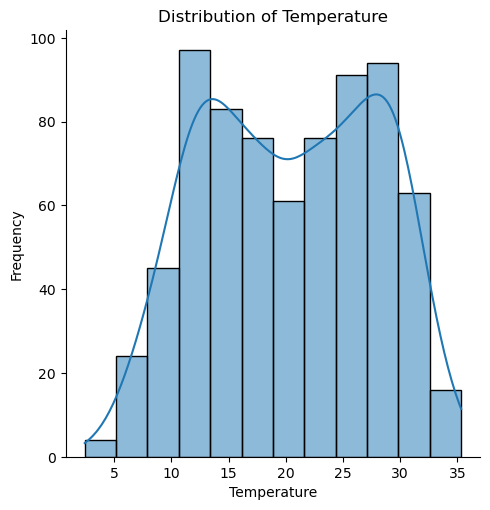

In [29]:
# Creating a distribution plot for the 'temp' column
sns.displot(boombikes['temp'], kde=True)

# Adding labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

# Show the plot
plt.show()


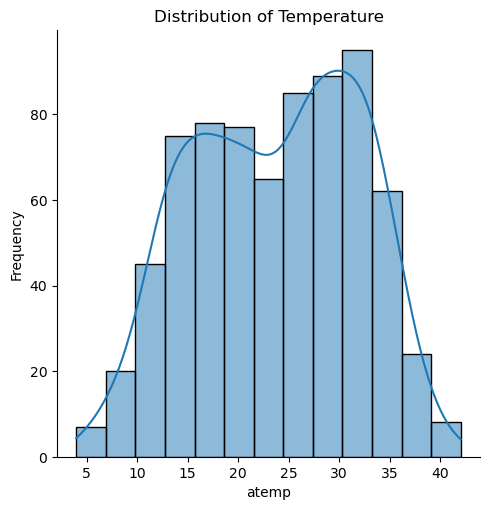

In [30]:
# Creating a distribution plot for the 'temp' column
sns.displot(boombikes['atemp'], kde=True)

# Adding labels and title
plt.xlabel('atemp')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

# Show the plot
plt.show()


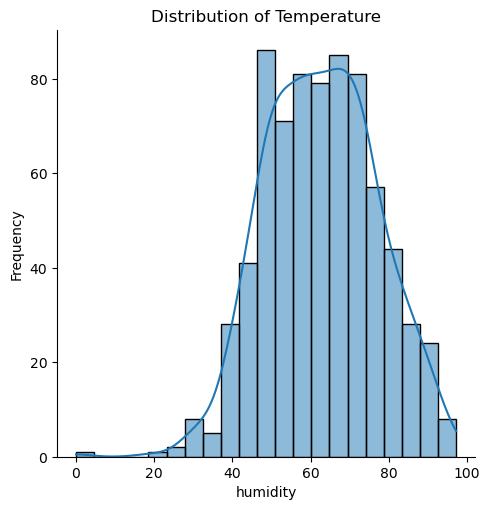

In [31]:
# Creating a distribution plot for the 'temp' column
sns.displot(boombikes['hum'], kde=True)

# Adding labels and title
plt.xlabel('humidity')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

# Show the plot
plt.show()


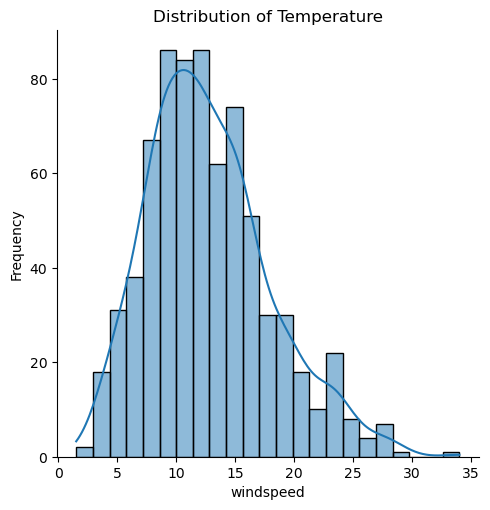

In [32]:
# wind speed
# Creating a distribution plot for the 'temp' column
sns.displot(boombikes['windspeed'], kde=True)

# Adding labels and title
plt.xlabel('windspeed')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

# Show the plot
plt.show()



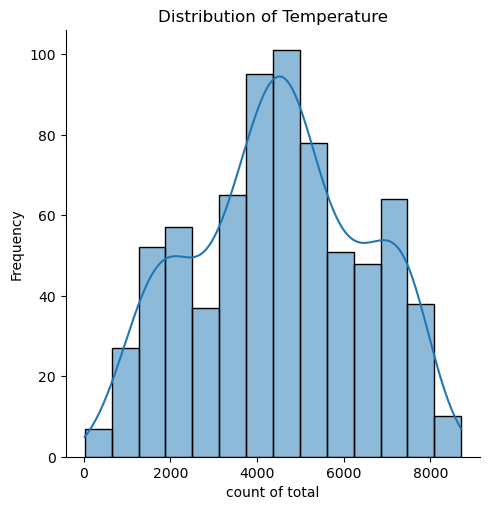

In [33]:
# Target variable: count of total rental bikes including both casual and registered

# Creating a distribution plot for the 'temp' column
sns.displot(boombikes['cnt'], kde=True)

# Adding labels and title
plt.xlabel('count of total')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

# Show the plot
plt.show()



In [34]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 91.4+ KB


In [35]:
# Converting date to datetime format
boombikes['dteday'] = pd.to_datetime(boombikes['dteday'], format='%d-%m-%Y')

In [36]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [37]:
# All categorical variables in the dataset
cat_var = [i for i in boombikes.select_dtypes(include ='object').columns]
cat_var.extend([i for i in boombikes.columns if boombikes[i].nunique()==2])

In [38]:
cat_var

['season',
 'yr',
 'mnth',
 'weekday',
 'weathersit',
 'yr',
 'holiday',
 'workingday']

In [39]:
# Creating a DataFrame with only these categorical variables
boombikes_categorical = boombikes[cat_var]

# Display the categorical DataFrame
boombikes_categorical

,season,yr,mnth,weekday,weathersit,yr,holiday,workingday
0,Spring,2018,Jan,Mon,Misty and Cloudy,2018,0,1
1,Spring,2018,Jan,Tue,Misty and Cloudy,2018,0,1
2,Spring,2018,Jan,Wed,Clear to Partly Cloudy,2018,0,1
3,Spring,2018,Jan,Thu,Clear to Partly Cloudy,2018,0,1
4,Spring,2018,Jan,Fri,Clear to Partly Cloudy,2018,0,1
...,...,...,...,...,...,...,...,...
725,Spring,2019,Dec,Fri,Misty and Cloudy,2019,0,1
726,Spring,2019,Dec,Sat,Misty and Cloudy,2019,0,0
727,Spring,2019,Dec,Sun,Misty and Cloudy,2019,0,0
728,Spring,2019,Dec,Mon,Clear to Partly Cloudy,2019,0,1


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

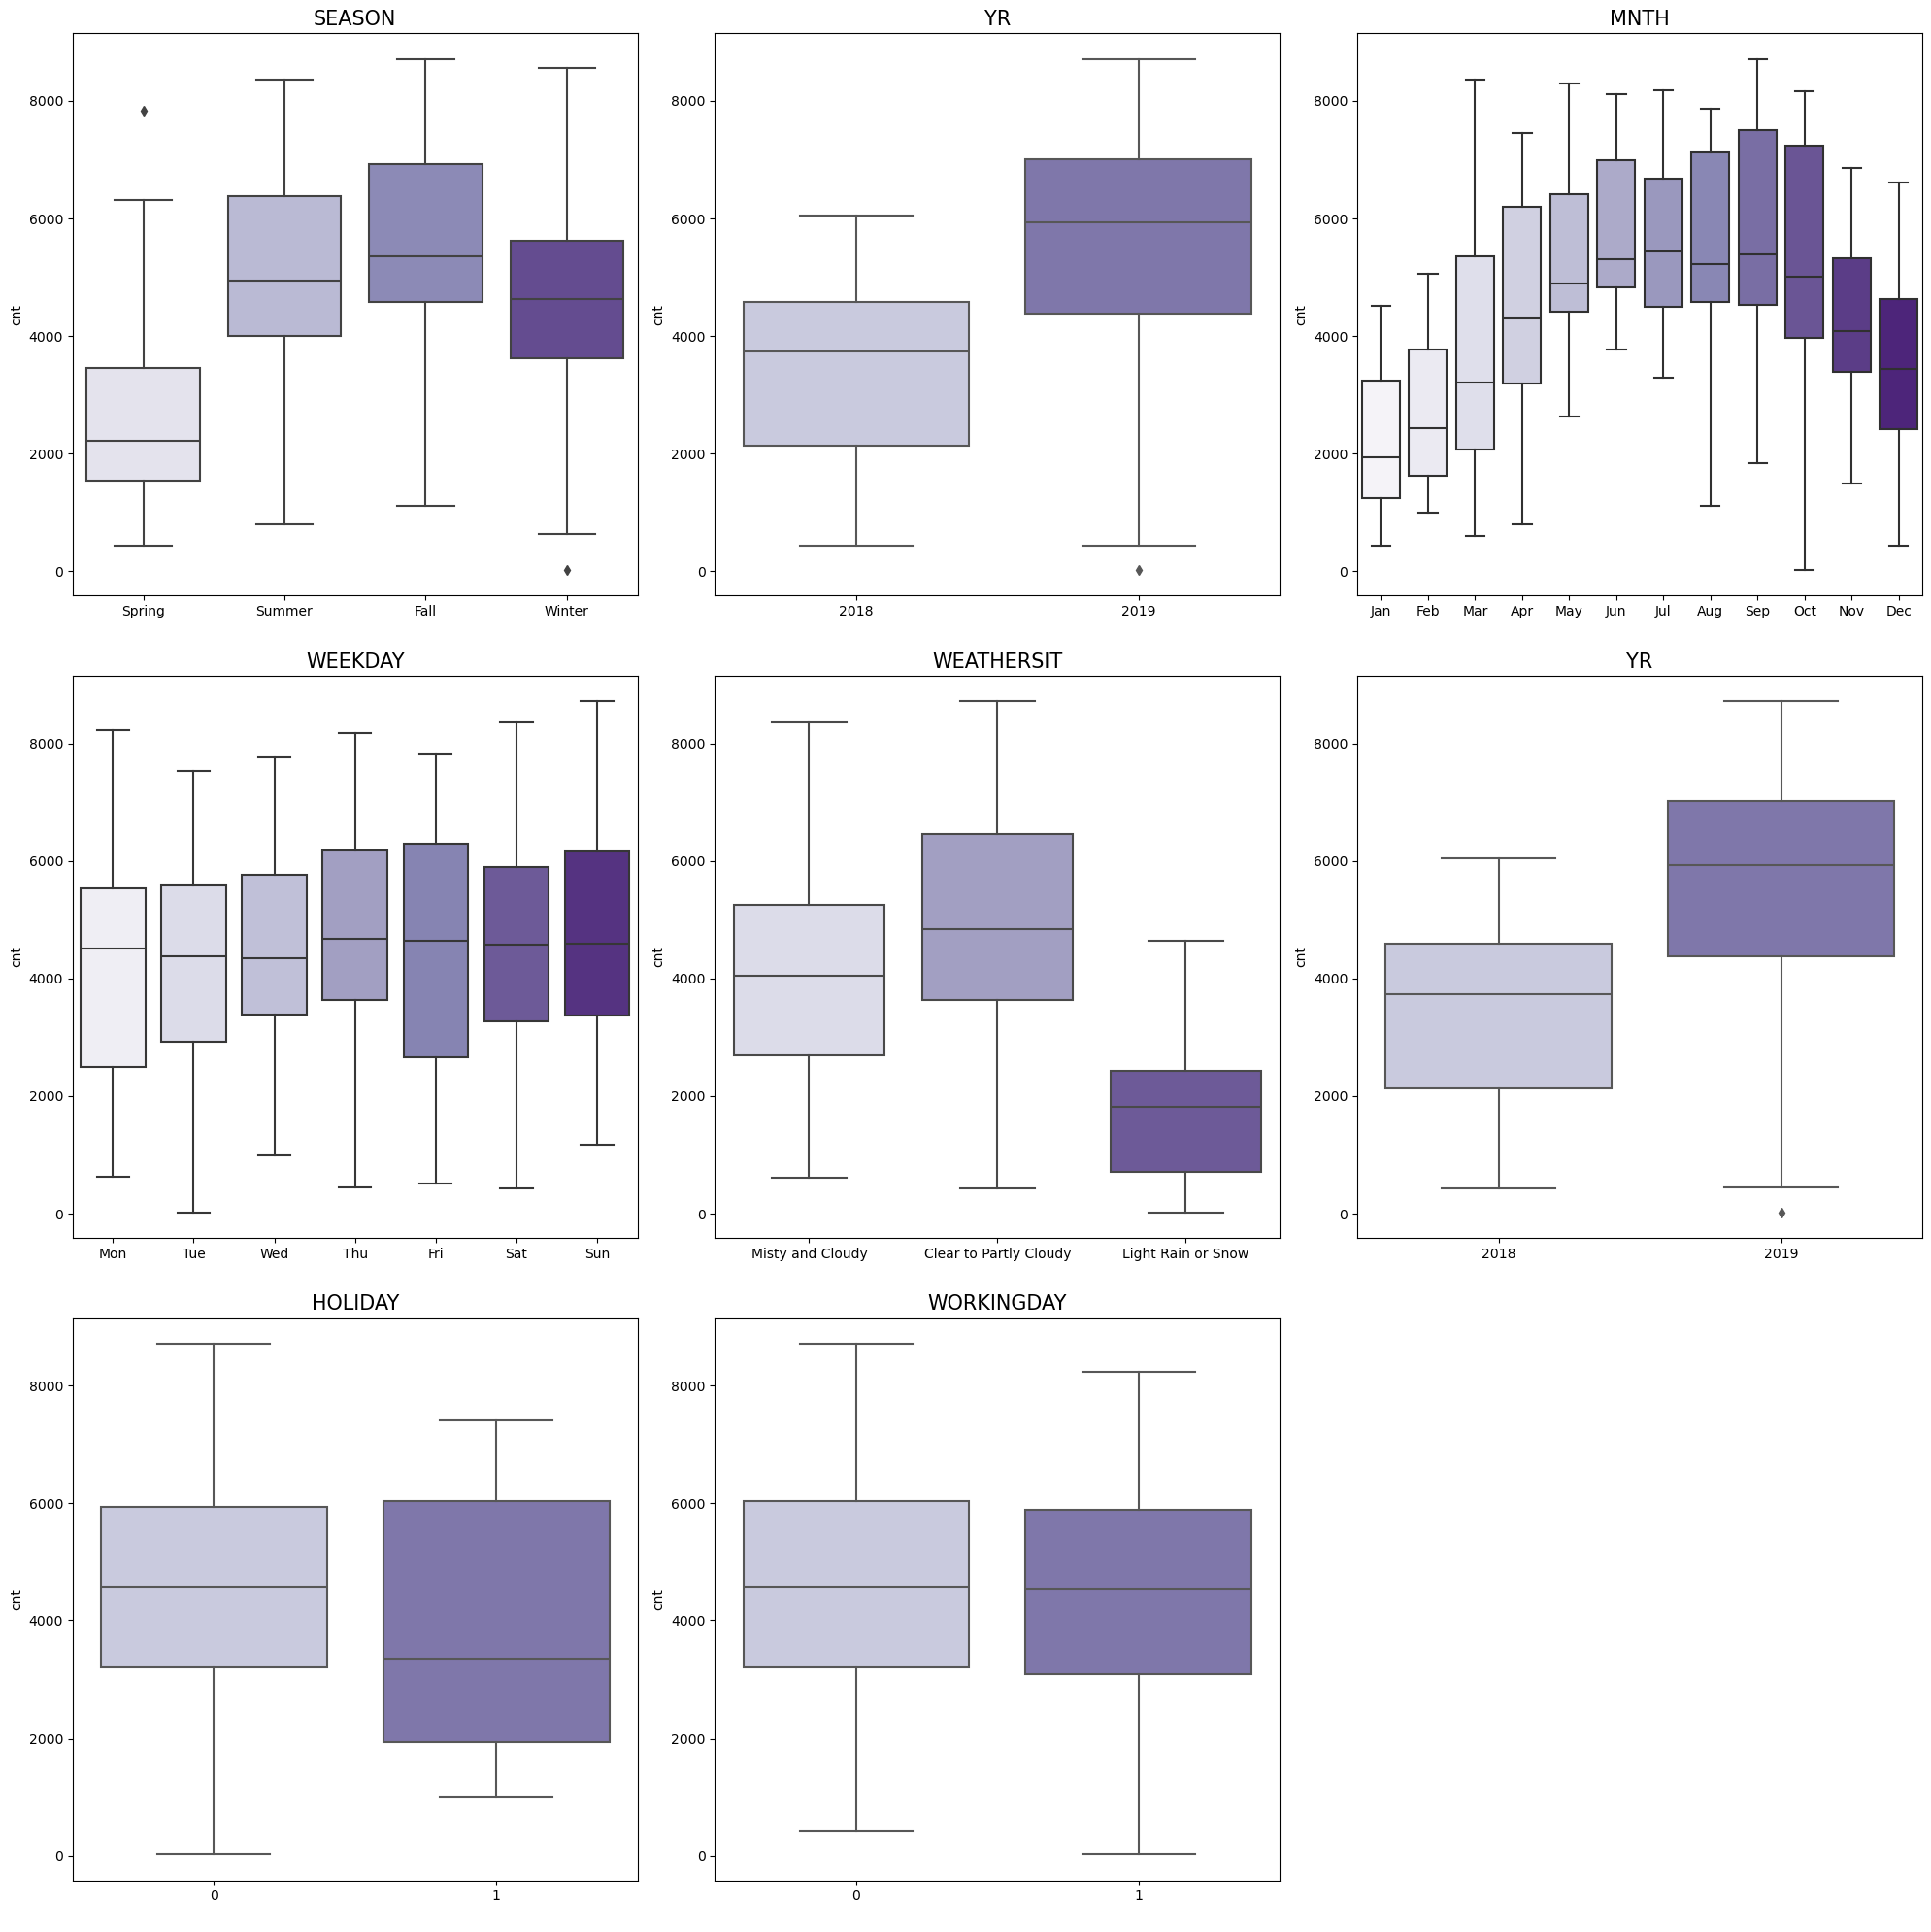

In [40]:
# Creating a figure with subplots
plt.figure(figsize=(20, 20))

# Looping through categorical variables to create boxplots
for i, var in enumerate(cat_var):
    plt.subplot(3, 3, i + 1)  # Adjusting subplot position
    sns.boxplot(x=var, y='cnt', data=boombikes, palette='Purples')
    plt.title(f'{var.upper()}', fontsize=15)
    plt.xlabel(' ')
    plt.ylabel('cnt')

# Adjusting layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


Based on the boxplots you provided for the categorical variables, here are the inferences about their effect on the dependent variable `cnt` (which likely represents the count of something like bike rentals):

1. **Season:**
   - **Summer and Fall** seasons appear to have higher median `cnt` values compared to Spring and Winter. 
   - **Winter** has the lowest median `cnt` and also shows some outliers. This suggests that the season has a significant effect on the dependent variable, with more rentals occurring in warmer months.

2. **Holiday:**
   - There doesn't seem to be a significant difference in the `cnt` distribution between holidays and non-holidays, although the median is slightly higher on holidays. This suggests that holidays may not have a major effect on bike rentals.

3. **Working Day:**
   - The `cnt` distribution appears similar between working days and non-working days. This implies that whether it's a working day or not may not have a large impact on the rentals.

4. **Weather Situation (`weathersit`):**
   - **Weather Situation A (likely representing clear or good weather)** has the highest median `cnt`, while **Weather Situation C (possibly indicating bad weather like rain or snow)** has the lowest. This is expected, as poor weather conditions typically reduce bike rentals.

5. **Month:**
   - There is a clear seasonal pattern, with the highest median `cnt` in the months of **July to September**. **Winter months (December, January, February)** have lower median `cnt` values. This reinforces the earlier inference that warmer months are associated with higher bike rentals.

6. **Weekday:**
   - The day of the week doesn't show much variation in the `cnt` distribution. This suggests that rentals are fairly consistent across different weekdays, with perhaps slight increases or decreases depending on the day.

7. **Year:**
   - The year 2019 has a significantly higher median `cnt` compared to 2018. This could indicate growth in bike rentals over time, possibly due to increased popularity or changes in the population or infrastructure.

### Overall Summary:
- **Season, weather situation, and month** have a noticeable impact on the dependent variable `cnt`, with warmer months and clear weather being associated with higher bike rentals.
- **Year** also shows an upward trend, suggesting increasing rentals over time.
- **Holiday, working day, and weekday** do not seem to have a strong impact on bike rentals. 

This information can be useful when building predictive models, as it highlights which variables are likely to have the most influence on the outcome.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [41]:
# Converting "casual","registered" and "cnt" numeric variables to float. 
# This step is performed to seperate out categorical variables 
# like 'yr','holiday','workingday' which have binary values in them
# List of columns to convert
numeric_columns = ['casual', 'registered', 'cnt']

# Converting each specified column to float
for column in numeric_columns:
    boombikes[column] = boombikes[column].astype(float)

# Display the data types to confirm changes
print(boombikes.dtypes)


instant                int64
dteday        datetime64[ns]
season                object
yr                    object
mnth                  object
holiday                int64
weekday               object
workingday             int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual               float64
registered           float64
cnt                  float64
dtype: object


In [42]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    float64       
 14  registered  730 non-null    float64       
 15  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), floa

In [43]:
# All numeric variables in the dataset
boombikes_numeric = boombikes.select_dtypes(include=['float'])
boombikes_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


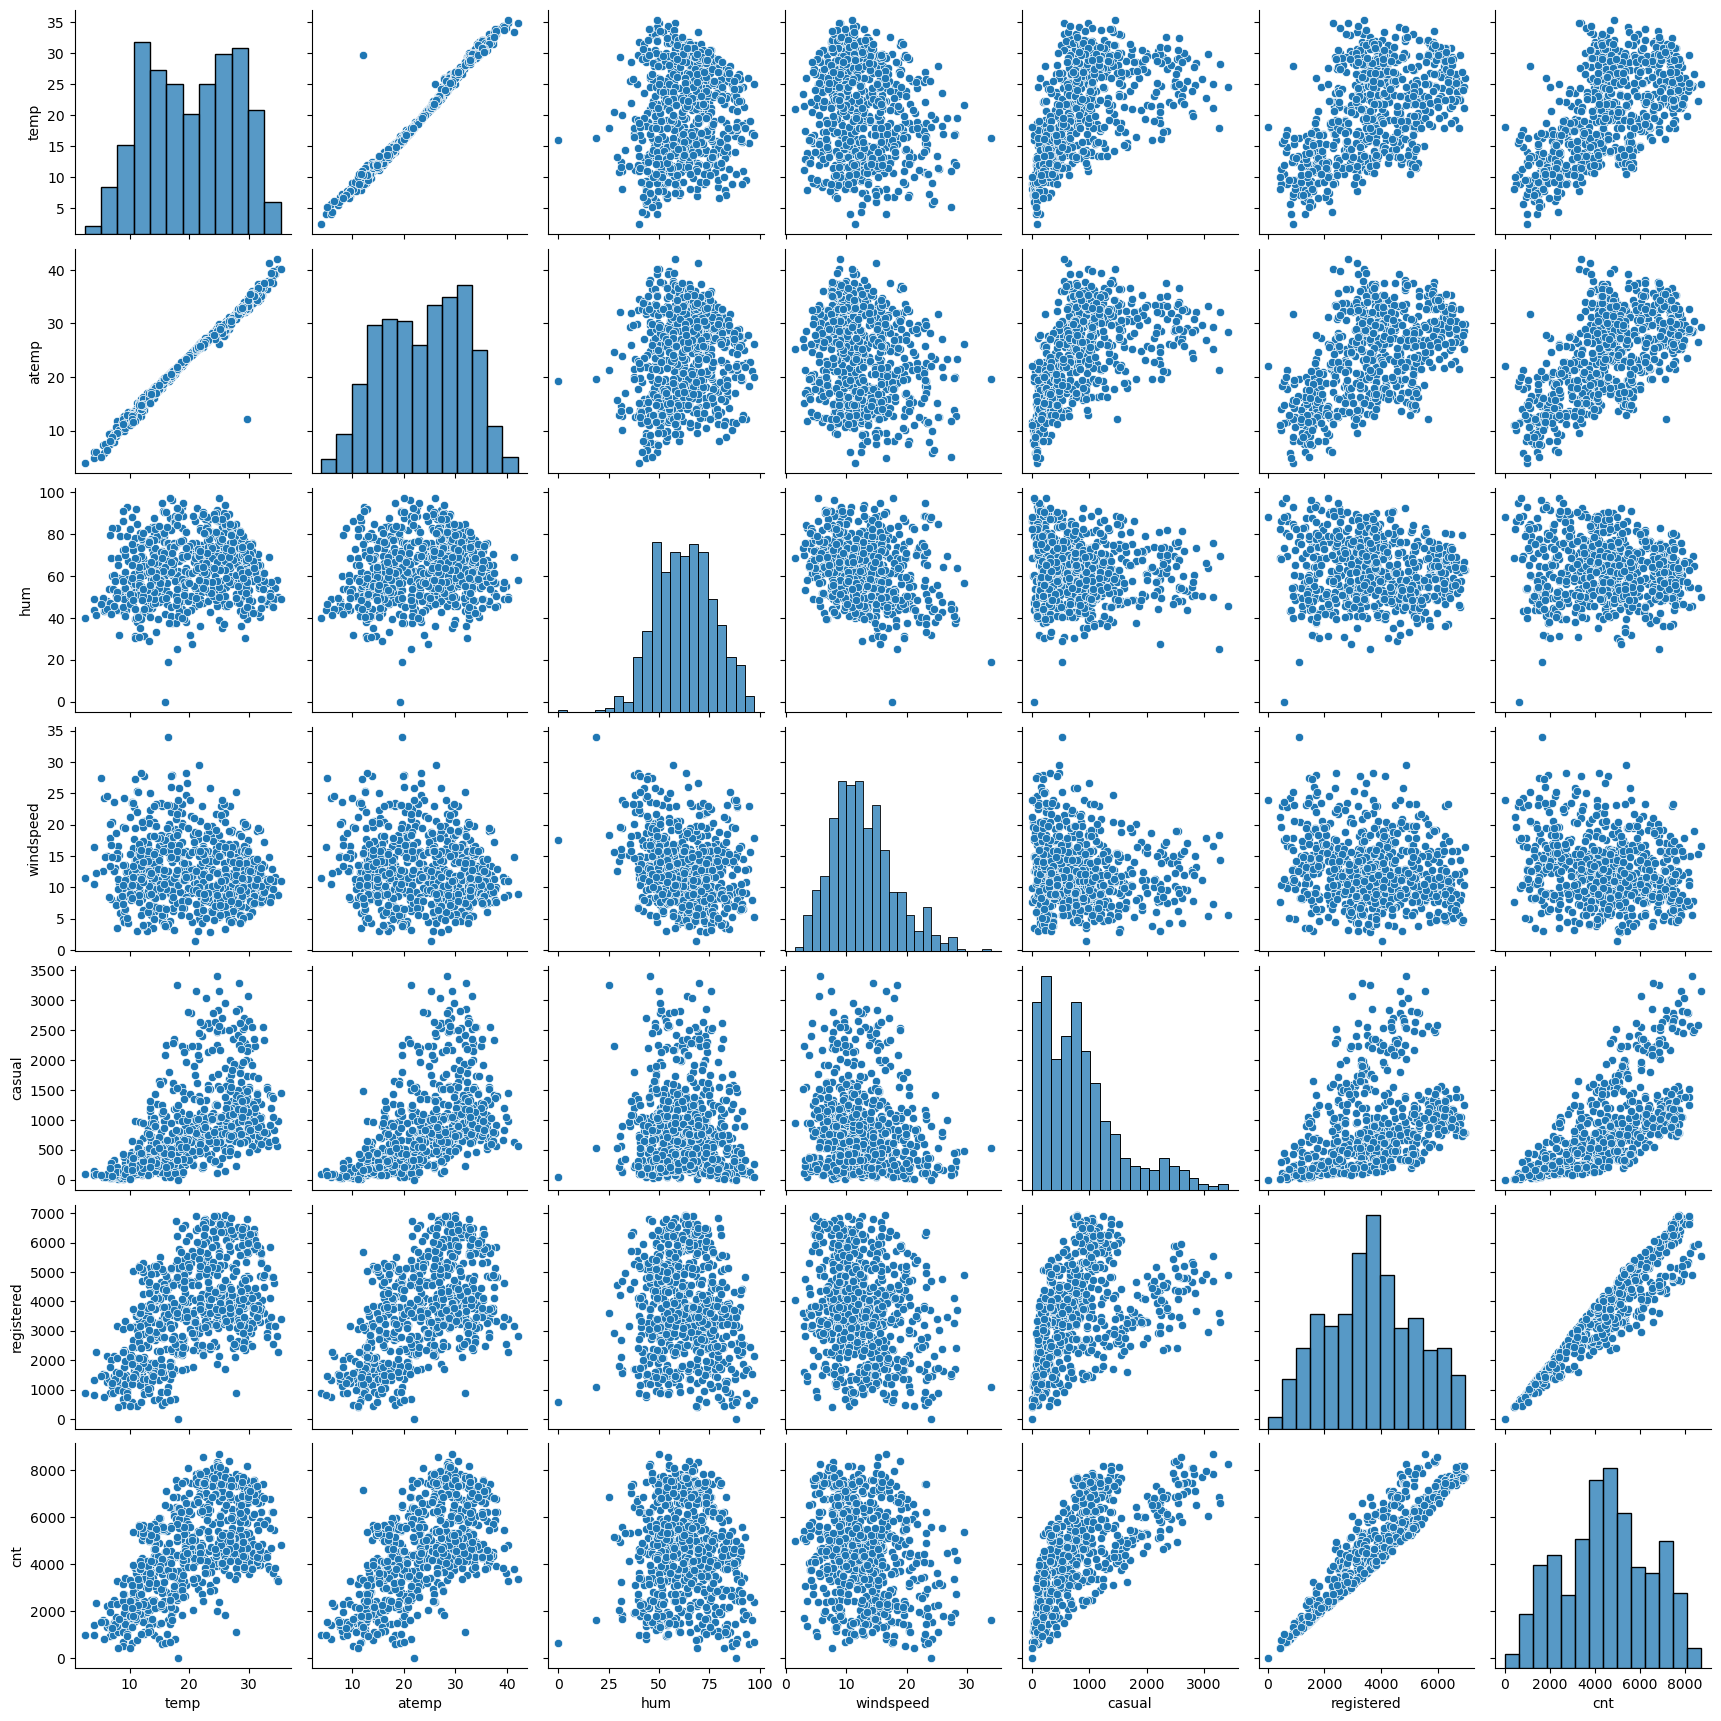

In [44]:
# Pairwise scatter plot
sns.pairplot(boombikes_numeric)

# Display the plot
plt.show()

We can better plot correlation matrix between variables to know the exact values of correlation between them. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [45]:
# Correlation matrix
cor = boombikes_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


Let's plot the correlations on a heatmap for better visualisation

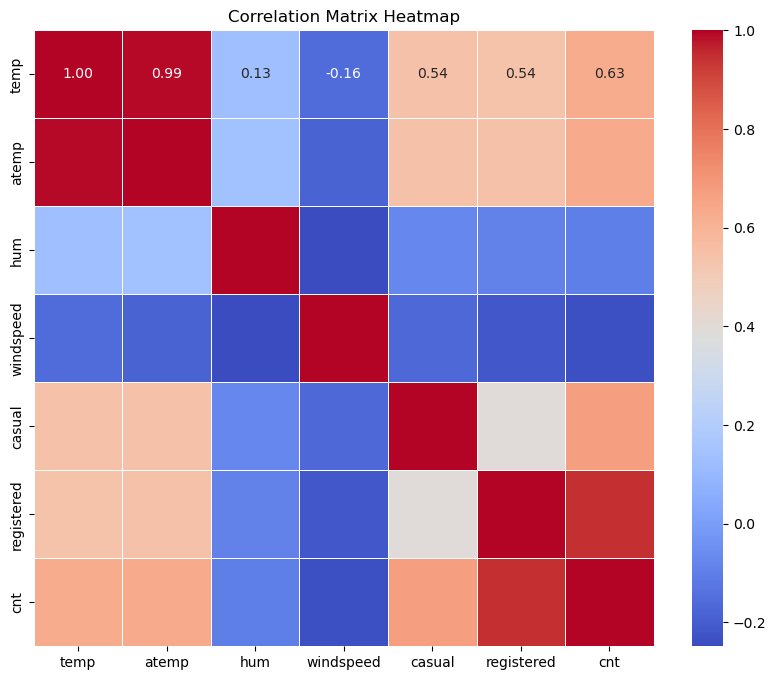

In [46]:
# heatmap

# You can go for a regular heatmap
# or for one as below by maskig the upper half using tril_indices_from()

plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The heatmap shows some useful insights:

Correlation of Count('cnt') with independent variables:
- Count('cnt') is highly (positively) correlated with 'casual' and 'registered' and further it is high with 'atemp'. We can clearly understand the high positive correlation of count with 'registered' and 'casual' as both of them together add up to represent count.

- Count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.

Correlation among independent variables:
- Some of the independent variables are highly correlated (look at the top-left part of matrix): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.


Thus, while building the model, we'll have to pay attention to multicollinearity.

In [47]:
#removing atemp as it is highly correlated with temp

boombikes = boombikes.drop(columns=['atemp'])
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,2018,Jan,0,Mon,1,Misty and Cloudy,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-01-02,Spring,2018,Jan,0,Tue,1,Misty and Cloudy,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-01-03,Spring,2018,Jan,0,Wed,1,Clear to Partly Cloudy,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-01-04,Spring,2018,Jan,0,Thu,1,Clear to Partly Cloudy,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-01-05,Spring,2018,Jan,0,Fri,1,Clear to Partly Cloudy,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.
Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

In [48]:
boombikes.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,2018,Jan,0,Mon,1,Misty and Cloudy,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-01-02,Spring,2018,Jan,0,Tue,1,Misty and Cloudy,14.902598,69.6087,16.652113,131.0,670.0,801.0


In [49]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    float64       
 13  registered  730 non-null    float64       
 14  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(5)
memory usage: 85.7+ 

In [50]:
# Subset all categorical variables
cat_var = [i for i in boombikes.select_dtypes(include ='object').columns]
cat_var.extend([i for i in boombikes.columns if boombikes[i].nunique()==2])
cat_var

['season',
 'yr',
 'mnth',
 'weekday',
 'weathersit',
 'yr',
 'holiday',
 'workingday']

#### Dummy Variables
The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers. 

For this, we will use something called `dummy variables`.

In [51]:
# Create dummy variables for the specified categorical columns
boombikes_dummies = pd.get_dummies(boombikes, drop_first=True, dtype=int)

# Display the first few rows of the DataFrame with dummy variables
boombikes_dummies.head()

,instant,dteday,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
0,1,2018-01-01,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,...,0,0,1,0,0,0,0,0,0,1
1,2,2018-01-02,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,...,0,0,0,0,0,0,1,0,0,1
2,3,2018-01-03,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-01-04,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-01-05,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Drop categorical variable columns
boombikes_dropped = boombikes.drop(columns=cat_var) 
boombikes_dropped.head()

,instant,dteday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-01-02,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-01-03,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-01-04,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-01-05,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


In [53]:
# Concatenate dummy variables with the original dataframe
boombikes_with_dummies = pd.concat([boombikes_dropped, boombikes_dummies], axis=1)
boombikes_with_dummies.head()

,instant,dteday,temp,hum,windspeed,casual,registered,cnt,instant,dteday,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
0,1,2018-01-01,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,2018-01-01,...,0,0,1,0,0,0,0,0,0,1
1,2,2018-01-02,14.902598,69.6087,16.652113,131.0,670.0,801.0,2,2018-01-02,...,0,0,0,0,0,0,1,0,0,1
2,3,2018-01-03,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,3,2018-01-03,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-01-04,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,4,2018-01-04,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-01-05,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,5,2018-01-05,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
boombikes_with_dummies = boombikes_with_dummies.drop(columns=['instant','dteday']) 
boombikes_with_dummies.head()

,temp,hum,windspeed,casual,registered,cnt,holiday,workingday,temp,hum,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
0,14.110847,80.5833,10.749882,331.0,654.0,985.0,0,1,14.110847,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,14.902598,69.6087,16.652113,131.0,670.0,801.0,0,1,14.902598,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,0,1,8.050924,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,0,1,8.200000,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,0,1,9.305237,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [55]:
boombikes_with_dummies.columns

Index(['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'holiday',
       'workingday', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Rain or Snow',
       'weathersit_Misty and Cloudy'],
      dtype='object')

In [56]:
duplicated_columns = boombikes_with_dummies.columns[boombikes_with_dummies.columns.duplicated()].unique()
print("Duplicated columns:", duplicated_columns)

Duplicated columns: Index(['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')


In [57]:
column_counts = pd.Series(boombikes_with_dummies.columns).value_counts()
# List columns that are duplicated
duplicates = column_counts[column_counts > 1]
print("Duplicate columns with counts:\n", duplicates)
boombikes_with_dummies = boombikes_with_dummies.loc[:, ~boombikes_with_dummies.columns.duplicated()]
boombikes_with_dummies.head()

Duplicate columns with counts:
 temp          2
windspeed     2
casual        2
registered    2
cnt           2
hum           2
Name: count, dtype: int64


,temp,hum,windspeed,casual,registered,cnt,holiday,workingday,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
0,14.110847,80.5833,10.749882,331.0,654.0,985.0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1,14.902598,69.6087,16.652113,131.0,670.0,801.0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
2,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
len(boombikes_with_dummies.columns)

31

In [59]:
# Drop columns 'casual' and 'registered', as they sum up to column 'cnt'.
# So lets only keep column 'cnt'
boombikes_with_dummies = boombikes_with_dummies.drop(columns=['casual','registered']) 
boombikes_with_dummies.head()


,temp,hum,windspeed,cnt,holiday,workingday,season_Spring,season_Summer,season_Winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
0,14.110847,80.5833,10.749882,985.0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,14.902598,69.6087,16.652113,801.0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,8.050924,43.7273,16.636703,1349.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562.0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,9.305237,43.6957,12.522300,1600.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
len(boombikes_with_dummies.columns)

29

In [61]:
boombikes_with_dummies.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'holiday', 'workingday',
       'season_Spring', 'season_Summer', 'season_Winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Rain or Snow',
       'weathersit_Misty and Cloudy'],
      dtype='object')

In [62]:
len(boombikes_with_dummies.columns)

29

In [63]:
# traintestsplit --> Scaling => FOLLOW THIS APPROACH

In [64]:
# Define features and target variable
X = boombikes_with_dummies.drop(columns=['cnt'])  # Features
y = boombikes_with_dummies['cnt']  # Target variable

In [65]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=100)

In [66]:
print(f'Trining set: {X_train.shape}')
print(f'Test set: {X_test.shape}')

Trining set: (511, 28)
Test set: (219, 28)


In [67]:
# visual inspection
X_train.sample(5)

,temp,hum,windspeed,holiday,workingday,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
217,29.383347,75.5000,15.292750,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
692,11.411653,40.4583,25.250357,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
427,13.359153,40.3333,22.416257,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
209,34.371653,54.2500,11.667246,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
610,29.007500,79.0833,10.125107,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

Let's scale all these columns using MinMaxScaler. You can use any other scaling method as well; it is totally up to you.

In [68]:
#  MinMaxScaler


In [69]:
from sklearn.preprocessing import MinMaxScaler

# Creating a scaler instance
scaler = MinMaxScaler()

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [71]:
#Initialising a list of feature names for scaling
scalar_list= [i for i in X_train.columns if X_train[i].nunique() >2]

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [72]:
X_train.head()

,temp,hum,windspeed,holiday,workingday,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
653,19.201653,55.8333,12.208807,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
576,29.246653,70.4167,11.083475,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
426,16.980847,62.1250,10.792293,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
728,10.489153,48.3333,23.500518,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
482,15.443347,48.9583,8.708325,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [73]:
X_train.shape

(511, 28)

In [74]:
y_train.shape

(511,)

In [75]:
X_train.head()

,temp,hum,windspeed,holiday,workingday,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
653,19.201653,55.8333,12.208807,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
576,29.246653,70.4167,11.083475,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
426,16.980847,62.1250,10.792293,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
728,10.489153,48.3333,23.500518,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
482,15.443347,48.9583,8.708325,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [76]:
y_train.head()

653    7534.0
576    7216.0
426    4066.0
728    1796.0
482    4220.0
Name: cnt, dtype: float64

In [77]:
X_train.columns

Index(['temp', 'hum', 'windspeed', 'holiday', 'workingday', 'season_Spring',
       'season_Summer', 'season_Winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Light Rain or Snow', 'weathersit_Misty and Cloudy'],
      dtype='object')

Let's see a pairplot for `temp` vs `cnt`.

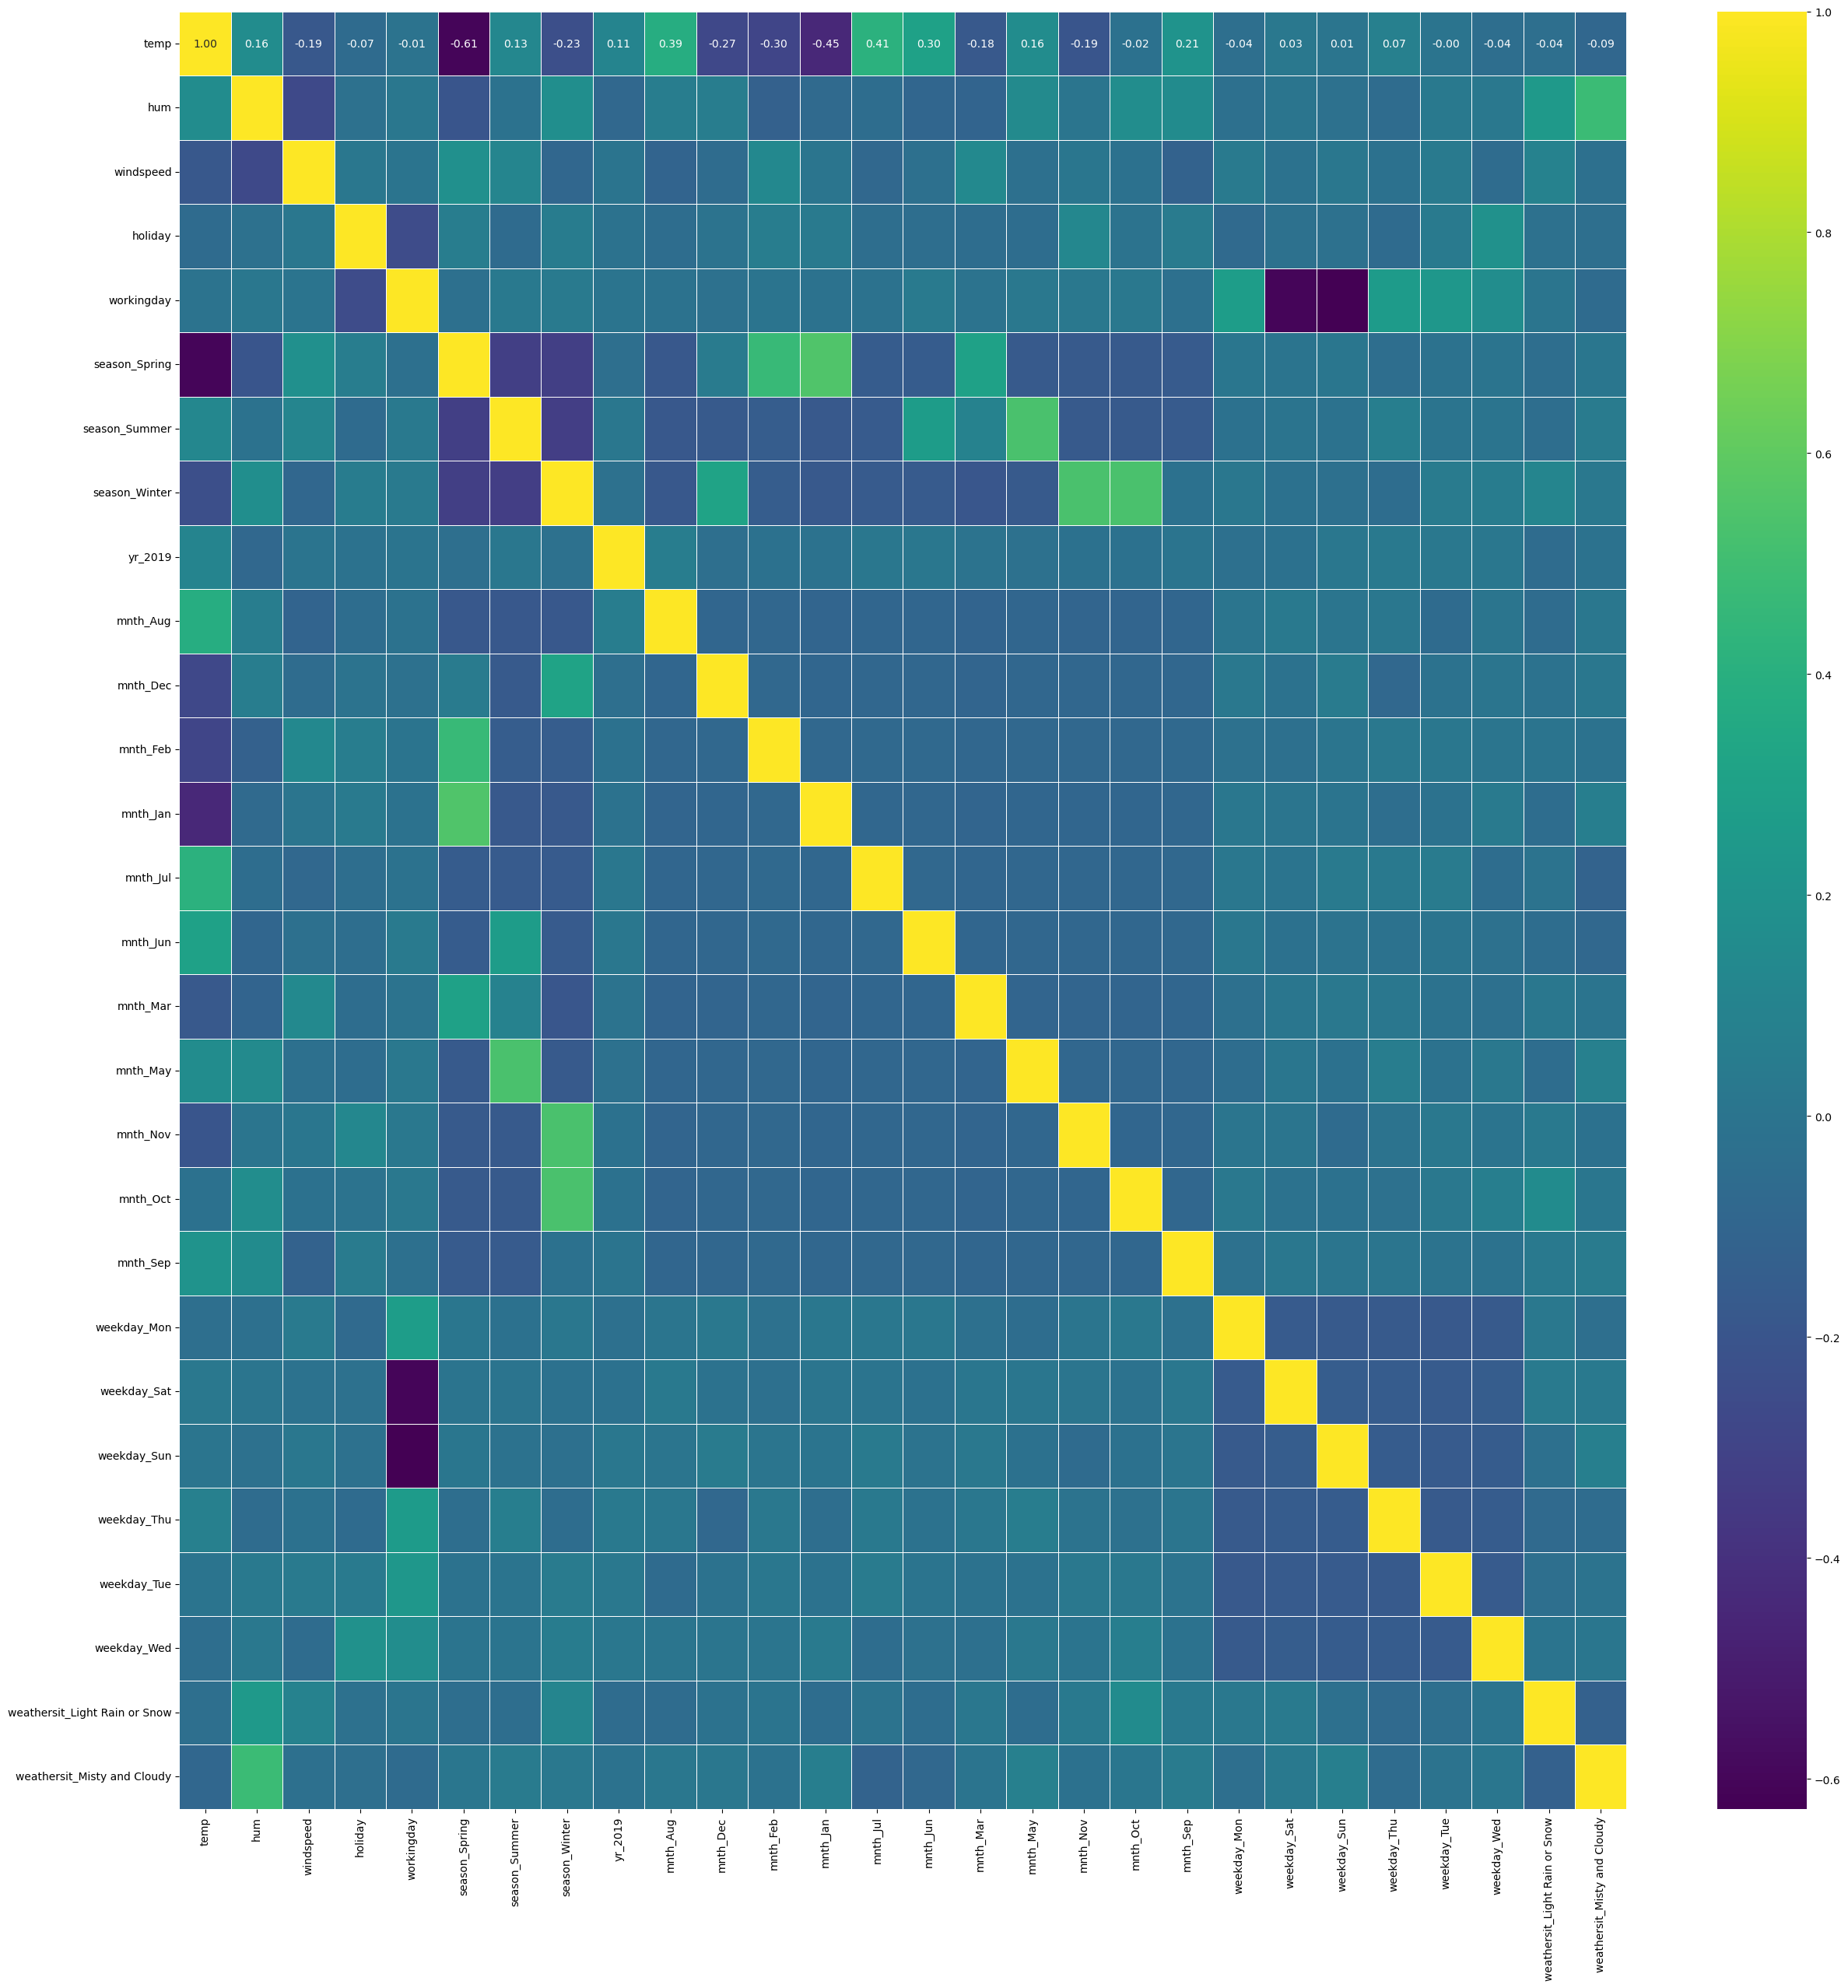

In [78]:
# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Set up the matplotlib figure
plt.figure(figsize=(30, 30))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()

In [79]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))

plt.show()

<Figure size 3000x3000 with 0 Axes>

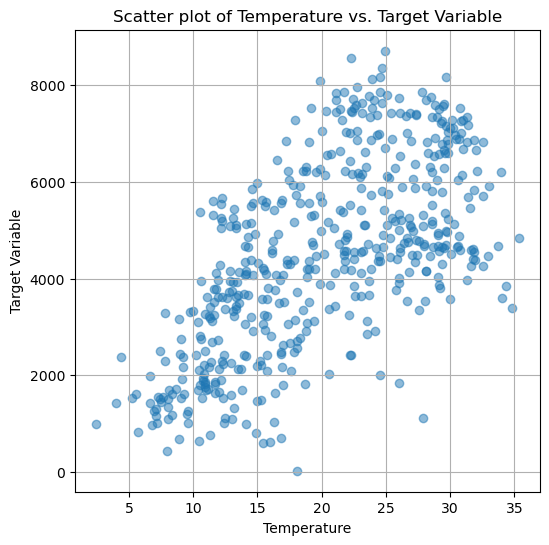

In [80]:


# Assuming X_train and y_train are defined and 'temp' is a column in X_train

plt.figure(figsize=[6,6])

# Scatter plot of 'temp' vs 'y_train'
plt.scatter(X_train['temp'], y_train, alpha=0.5)
plt.title('Scatter plot of Temperature vs. Target Variable')
plt.xlabel('Temperature')
plt.ylabel('Target Variable')
plt.grid(True)

plt.show()


In [81]:
plt.figure(figsize=[6,6])
# X_train.temp vs y_train
plt.show()

<Figure size 600x600 with 0 Axes>

In [82]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
regressor = LinearRegression()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Display the predictions
print(y_pred)


[ 3562.48582994  7795.35449452  3763.9967988   5376.46136537
  5261.06080653  3944.89667265  4345.32797719  3940.24956752
  6280.15817183  4793.32763814  7139.88702538  5991.2444759
  4311.61242497  6221.02897264  1281.02264009  6988.92982159
  5300.27199938  1438.70916546  5365.94902117  5192.68489604
  7287.31689804  5380.24455959  7074.98812122  1205.01679471
  3557.95163508  4630.19775615  7332.7600549   4453.35574347
  7433.2103934   4215.7459575   6932.36453021  6389.58120551
  4370.3497053   5505.87442505  1474.8358589   4253.59319663
  4562.32015937  6249.65770584  1135.2096897   3934.35390011
  4280.96373733  3032.53505004  5770.36625691  5197.36920318
  5607.82560466  7061.39964033  1907.88241041  5443.33240667
  5002.63555342  2384.40855581  6903.02480832  4032.36921329
  4868.01783584  7418.35386583  3346.16298871  7168.17761586
  4847.51756182  4554.15452215  1558.622383    5669.92320718
  4391.69512112  4200.66336509  1995.04437783  5597.73827983
  4613.56065763  5469.972

In [83]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
temp,116.276416
hum,-14.190973
windspeed,-50.909856
holiday,-1170.523846
workingday,-511.116239
season_Spring,-351.414072
season_Summer,404.224289
season_Winter,977.312460
yr_2019,2012.790344
mnth_Aug,238.926496


In [84]:
# Print the coefficients and intercept

regressor.intercept_

3278.7005110192304

In [85]:
# Print the intercept
print("Intercept:", regressor.intercept_)

Intercept: 3278.7005110192304


In [86]:
# Making Predictions
y_pred = regressor.predict(X_test)
# compare the actual output values for X_test with the predicted values
df = pd.DataFrame({
    "Actual" : y_test,
    "Predicted" : y_pred
})
df

,Actual,Predicted
184,6043.0,3562.485830
535,6211.0,7795.354495
299,2659.0,3763.996799
221,4780.0,5376.461365
152,4968.0,5261.060807
...,...,...
400,2947.0,3061.785411
702,6606.0,5931.442196
127,4333.0,4527.797410
640,7572.0,7143.774512


In [87]:
from sklearn import metrics

# Assuming y_test and y_pred are the true and predicted values respectively
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 580.8722082304399
Mean Squared Error: 615761.788835866
Root Mean Squared Error: 784.7049055765269


In [88]:
from sklearn import metrics

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)  # squared=False returns RMSE

# Print metrics
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)


Mean Absolute Error: 580.8722082304399
Mean Squared Error: 615761.788835866
Root Mean Squared Error: 784.7049055765269


In [89]:
from sklearn.metrics import r2_score
print('R2 Score:',       )

R2 Score:


In [90]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(y_test, y_pred)

print('R² Score:', r2)


R² Score: 0.8283997096921482


In [91]:
yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8504120577951848 0.8417223018164819


In [92]:
# Predict on test data
yhat = regressor.predict(X_test)

# Calculate residuals and total sum of squares
SS_Residual = np.sum((y_test - yhat) ** 2)
SS_Total = np.sum((y_test - np.mean(y_test)) ** 2)

# Calculate R-squared
r_squared = 1 - (SS_Residual / SS_Total)

# Calculate adjusted R-squared
n = len(y_test)  # Number of observations in test set
p = X_test.shape[1]  # Number of features
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print('R-squared:', r_squared)
print('Adjusted R-squared:', adjusted_r_squared)


R-squared: 0.8283997096921482
Adjusted R-squared: 0.8031112458573069


This model has an Adjusted R-squared value of **89.93%** which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable. 

In [93]:
len(X_train.columns)

28

#### Model Building Using RFE

Now, you have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

https://machinelearningmastery.com/rfe-feature-selection-in-python/

In [94]:
# https://medium.com/@aneesha/recursive-feature-elimination-with-scikit-learn-3a2cbdf23fb7

import numpy as np

# Predict on test data
yhat = regressor.predict(X_test)

# Calculate residuals and total sum of squares
SS_Residual = np.sum((y_test - yhat) ** 2)
SS_Total = np.sum((y_test - np.mean(y_test)) ** 2)

# Calculate R-squared
r_squared = 1 - (SS_Residual / SS_Total)

# Calculate adjusted R-squared
n = len(y_test)  # Number of observations in test set
p = X_test.shape[1]  # Number of features
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print('R-squared:', r_squared)
print('Adjusted R-squared:', adjusted_r_squared)


R-squared: 0.8283997096921482
Adjusted R-squared: 0.8031112458573069


In [95]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn import datasets

# Load the Iris dataset
dataset = datasets.load_iris()

# Initialize the LinearSVC model
svm = LinearSVC()

# Create the RFE model and select 3 attributes
rfe = RFE(estimator=svm, n_features_to_select=3)
rfe = rfe.fit(dataset.data, dataset.target)

# Print the results
print("Selected Features:", rfe.support_)
print("Feature Ranking:", rfe.ranking_)

Selected Features: [False  True  True  True]
Feature Ranking: [2 1 1 1]


In [97]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('temp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('holiday', True, 1)]

Building model using statsmodel, for the detailed statistics.

In [98]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming X_train is your training data and y_train is your target variable
model = LinearRegression()
rfe = RFE(model, n_features_to_select=4)  # Adjust the number of features to select
rfe = rfe.fit(X_train, y_train)

# Get the selected features
X_train_rfe = X_train.columns[rfe.support_]
X_train_rfe


Index(['season_Spring', 'yr_2019', 'mnth_Nov',
       'weathersit_Light Rain or Snow'],
      dtype='object')

In [99]:
# Assuming 'rfe' is your RFE instance and 'X_train' is your training data
selected_features = X_train.columns[rfe.support_]

# Convert to DataFrame or list and display
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features'])
print(selected_features_df)

# Alternatively, you can convert to a list if preferred
selected_features_list = selected_features.tolist()
print(selected_features_list)


               Selected Features
0                  season_Spring
1                        yr_2019
2                       mnth_Nov
3  weathersit_Light Rain or Snow
['season_Spring', 'yr_2019', 'mnth_Nov', 'weathersit_Light Rain or Snow']


In [100]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

__MODEL 1:__

In [101]:
X_train_with_const = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, X_train_with_const).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.86
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          3.74e-179
Time:                        18:56:15   Log-Likelihood:                -4111.2
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     482   BIC:                             8403.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [102]:
# List of columns to drop based on high p-values
cols_to_drop = [ 'workingday', 'season_Spring','mnth_Aug','mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 
               'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed']

# Drop these columns from your DataFrame
X_train_reduced = X_train.drop(columns=cols_to_drop, axis=1)
X_train_reduced.head()

,temp,hum,windspeed,holiday,season_Summer,season_Winter,yr_2019,mnth_Sep,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
653,19.201653,55.8333,12.208807,0,0,1,1,0,0,0
576,29.246653,70.4167,11.083475,0,0,0,1,0,0,0
426,16.980847,62.1250,10.792293,0,0,0,1,0,0,1
728,10.489153,48.3333,23.500518,0,0,0,1,0,0,0
482,15.443347,48.9583,8.708325,0,1,0,1,0,0,1


__MODEL 2:__

In [103]:
X_train_with_const = sm.add_constant(X_train_reduced)

# Fit the OLS model
model = sm.OLS(y_train, X_train_with_const).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.5
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          4.87e-190
Time:                        18:56:15   Log-Likelihood:                -4132.5
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     500   BIC:                             8334.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [104]:
from statsmodels.tools.tools import add_constant


In [105]:
#Calculating the Variance Inflation Factordef calculate_vif(X):
def calculate_vif(X):
    X = add_constant(X)  # Adds a constant term to the predictors
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Replace X_train_reduced with your actual DataFrame
vif_data = calculate_vif(X_train_reduced)
vif_data

,feature,VIF
0,const,51.342469
1,temp,1.272208
2,hum,1.857075
3,windspeed,1.179401
4,holiday,1.015213
5,season_Summer,1.192863
6,season_Winter,1.253670
7,yr_2019,1.027545
8,mnth_Sep,1.114846
9,weathersit_Light Rain or Snow,1.232582


### Residual Analysis of Model

In [106]:
lm = sm.OLS(y_train, X_train_reduced).fit()
y_train_price = lm.predict(X_train_reduced)

In [107]:
# Assuming X_train, X_test, y_train, y_test
# Train your model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

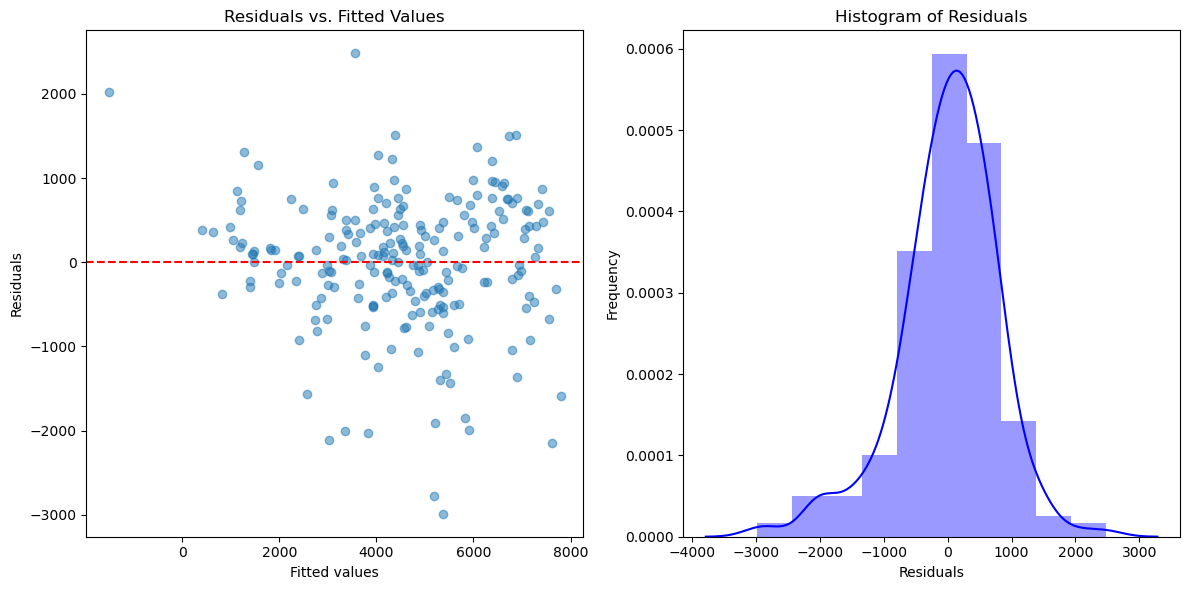

In [108]:
# Assuming y_train and y_train_price are your actual and predicted values
errors = y_train - y_train_price

# Plot Residuals vs Fitted Values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Histogram of Residuals
plt.subplot(1, 2, 2)
sns.distplot(residuals, bins=10, color= 'blue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()


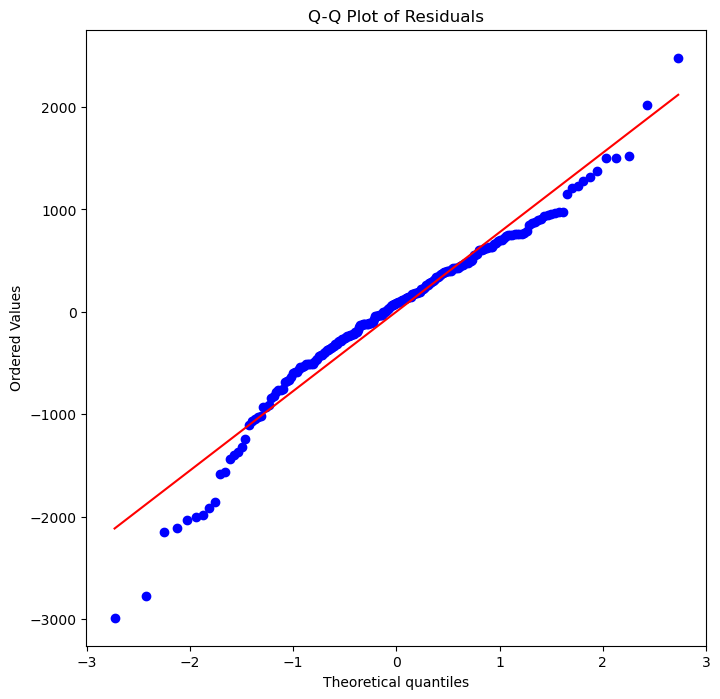

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test
# Train your model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Q-Q Plot
plt.figure(figsize=(8, 8))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


#### Testing for homoscedasticity

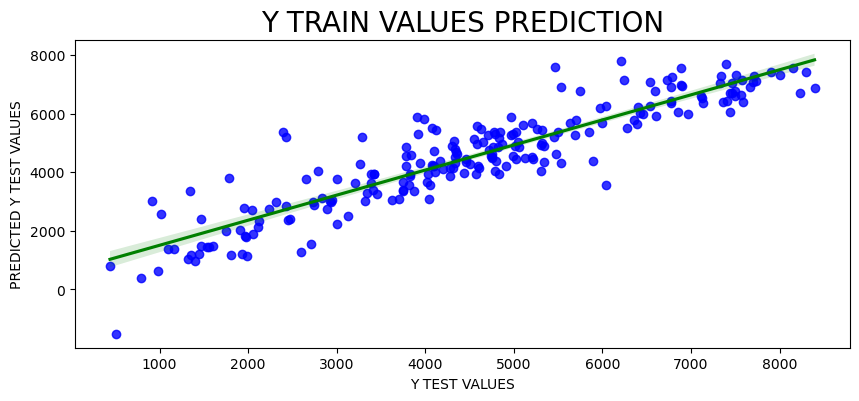

In [110]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure(figsize=(10, 4))

# Plotting fig
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'green'})

# Setting title, X and Y labels
plt.title('y train values prediction'.upper(), fontsize=20)
plt.xlabel('y test values'.upper(), fontsize=10)
plt.ylabel('Predicted y test values'.upper(), fontsize=10)

plt.show()


__Prediction and Evaluation__

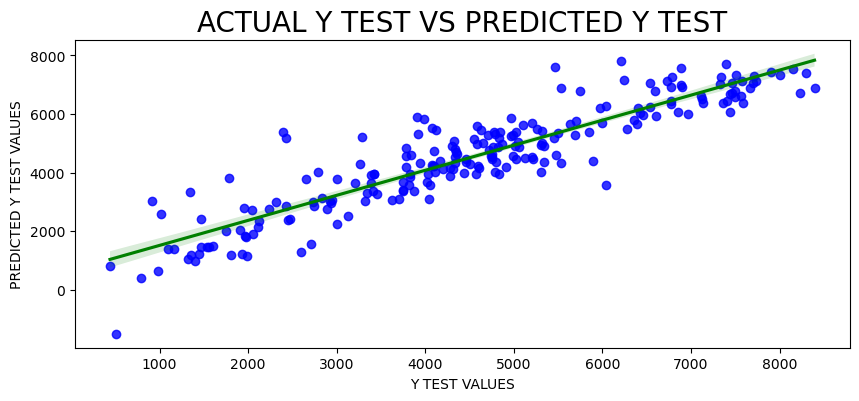

In [111]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure(figsize=(10, 4))

# Plotting fig
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'green'})

# Setting title, X and Y labels
plt.title('Actual y test vs Predicted y test'.upper(), fontsize=20)
plt.xlabel('y test values'.upper(), fontsize=10)
plt.ylabel('Predicted y test values'.upper(), fontsize=10)

plt.show()


In [112]:
X_test_new = X_test[X_train_reduced.columns]

In [113]:
y_test_pred = lm.predict(X_test_new)

In [114]:
X_train_new = X_train[X_train_reduced.columns]
y_train_pred = lm.predict(X_train_new)

In [115]:
print('R2 score of test data predictions:', round(r2_score(y_test_pred,  y_test),5))
print('R2 score of train data predictions:', round(r2_score(y_train_pred, y_train),5))
print('Absolute difference between R2 scores of test and train dataset predictions:', 
      abs(round(r2_score(y_test_pred,  y_test) - r2_score(y_train_pred, y_train), 5)))

R2 score of test data predictions: 0.7768
R2 score of train data predictions: 0.80206
Absolute difference between R2 scores of test and train dataset predictions: 0.02526


##### Equation of prediction

In [116]:
# Initializing const variable for const
const=  1771.8809 #  from the ols model
Parameter_series = pd.Series(lm.params)
print(Parameter_series)
print(len(Parameter_series))

temp                              161.582495
hum                                 2.223564
windspeed                         -19.870877
holiday                          -789.275536
season_Summer                     784.521114
season_Winter                    1268.277950
yr_2019                          2080.009542
mnth_Sep                          861.373752
weathersit_Light Rain or Snow   -2518.148049
weathersit_Misty and Cloudy      -637.189795
dtype: float64
10


In [117]:
# Equation

print(f'Demand = {round(const,3)}')
for i in range(len(Parameter_series)):
          if i != len(Parameter_series)-1:
              print(f'\t{Parameter_series.index[i]} x {round(Parameter_series.values[i], 3)} + ')
          else:
              print(f'\t{Parameter_series.index[i]} x {round(Parameter_series.values[i], 3)}')

Demand = 1771.881
	temp x 161.582 + 
	hum x 2.224 + 
	windspeed x -19.871 + 
	holiday x -789.276 + 
	season_Summer x 784.521 + 
	season_Winter x 1268.278 + 
	yr_2019 x 2080.01 + 
	mnth_Sep x 861.374 + 
	weathersit_Light Rain or Snow x -2518.148 + 
	weathersit_Misty and Cloudy x -637.19


In [118]:
def nImportantFeatures(sseries, n):
    sorted_series = sseries.sort_values(key=lambda x: abs(x), ascending=False)
    return sorted_series.head(n)


In [119]:
descending_importance= nImportantFeatures(Parameter_series, len(Parameter_series))
descending_importance

weathersit_Light Rain or Snow   -2518.148049
yr_2019                          2080.009542
season_Winter                    1268.277950
mnth_Sep                          861.373752
holiday                          -789.275536
season_Summer                     784.521114
weathersit_Misty and Cloudy      -637.189795
temp                              161.582495
windspeed                         -19.870877
hum                                 2.223564
dtype: float64

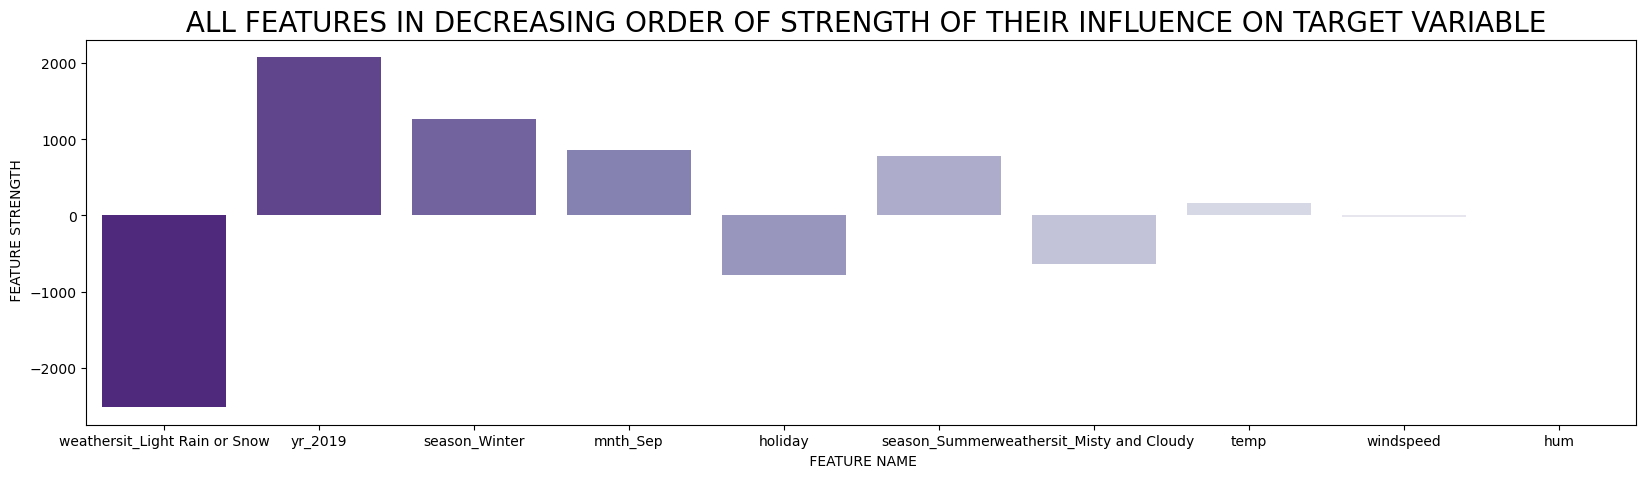

In [120]:
# Plottoing all features 
fig = plt.figure(figsize=(20, 5))

# Plotting fig
sns.barplot(x=descending_importance.index, y=descending_importance.values, palette='Purples_r')

# Setting title, X and Y labels
plt.title(' All features in decreasing order of strength of their influence on target variable'.upper(), fontsize=20)
plt.xlabel(' feature name'.upper(), fontsize=10)
plt.ylabel(' Feature strength'.upper(), fontsize=10)

plt.show()

#### BUSINESS RECOMENDATIONS

In [121]:
# Identifying top 3 Predictors
top_3_features = nImportantFeatures(Parameter_series, 3)
top_3_features

weathersit_Light Rain or Snow   -2518.148049
yr_2019                          2080.009542
season_Winter                    1268.277950
dtype: float64

##### plotting Top 3 features based on feature strength

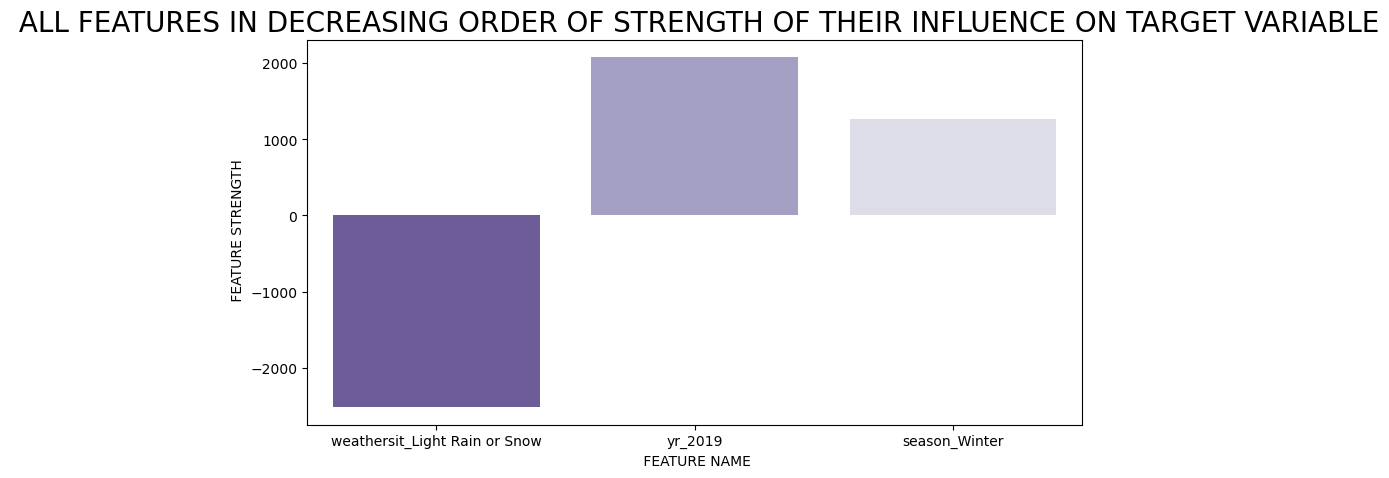

In [122]:
# Plottoing all features 
fig = plt.figure(figsize=(10, 5))

# Plotting fig
sns.barplot(x=top_3_features.index, y=top_3_features.values, palette='Purples_r')

# Setting title, X and Y labels
plt.title(' All features in decreasing order of strength of their influence on target variable'.upper(), fontsize=20)
plt.xlabel(' feature name'.upper(), fontsize=10)
plt.ylabel(' Feature strength'.upper(), fontsize=10)

plt.show()

### 
Final business recommendations based on above

##  1. Explain the linear regression algorithm in detail.
Linear regression is a fundamental statistical method used to model the relationship between a dependent variable and one or more independent variables. It is widely used for prediction and forecasting, and it is the foundation for more complex statistical methods.

### 1. **Purpose of Linear Regression:**
   - The primary goal of linear regression is to predict the value of a dependent variable (also called the target variable) based on the values of one or more independent variables (also called predictor variables).
   - It assumes a linear relationship between the dependent and independent variables.

### 2. **Types of Linear Regression:**
   - **Simple Linear Regression:** Involves one dependent variable and one independent variable.
   - **Multiple Linear Regression:** Involves one dependent variable and two or more independent variables.

### 3. **The Linear Regression Model:**
   - The general form of a linear regression equatio is:
     [
     y= \beta_0 + beta_1x_1 + beta_2x2 + \dots + beta_nx_n + \psilon
     \]
     - **y:** Dependent variable (what you are trying to predict)
     - **x_1, x_2, ..., x_n:** Independent variables (the predictors)
     - **\beta_0:** The intercept (value of y when all x's are 0)
     - **\beta_1, \beta_2, ..., \beta_n:** The coefficients of the independent variables (these represent the change in y for a one-unit change in the corresponding x)
     - **\epsilon:** The error term (captures the deviation of actual data points from the predicted line)

### 4. **Assumptions of Linear Regression:**
   - **Linearity:** The relationship between the dependent and independent variables is linear.
   - **Independence:** Observations are independent of each other.
   - **Homoscedasticity:** The variance of errors is the same across all levels of the independent variables.
   - **Normality:** The residuals (errors) of the model are normally distributed.
   - **No Multicollinearity:** In multiple regression, the independent variables should not be highly correlated with each other.

### 5. **Fitting the Model:**
   - **Ordinary Least Squares (OLS):** The most common method used to estimate the coefficients (\(\beta_0, \beta_1, ..., \beta_n\)). OLS minimizes the sum of the squared differences between the observed values and the values predicted by the model:
     \[
     \text{Minimize } \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
     \]
     - Here, \(y_i\) is the observed value, and \(\hat{y}_i\) is the predicted value from the model.

### 6. **Evaluating the Model:**
   - **R-squared (R²):** Measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Values range from 0 to 1, with higher values indicating a better fit.
   - **Adjusted R-squared:** Adjusted for the number of predictors in the model, providing a more accurate measure in the context of multiple regression.
   - **Mean Absolute Error (MAE):** The average of the absolute differences between actual and predicted values.
   - **Mean Squared Error (MSE):** The average of the squared differences between actual and predicted values.
   - **Root Mean Squared Error (RMSE):** The square root of MSE, representing the average distance between the observed and predicted values.

### 7. **Interpreting the Coefficients:**
   - Each coefficient represents the change in the dependent variable for a one-unit change in the corresponding independent variable, holding all other variables constant.
   - The sign (+/-) of the coefficient indicates the direction of the relationship between the predictor and the outcome.

### 8. **Assumption Checking:**
   - **Residual Plots:** Used to check the assumptions of linear regression. For example, residuals vs. fitted values plot can help in identifying heteroscedasticity.
   - **Q-Q Plot:** Assesses whether residuals are normally distributed.
   - **Variance Inflation Factor (VIF):** Measures multicollinearity; VIF values greater than 10 suggest high multicollinearity.

### 9. **Advantages and Disadvantages:**
   - **Advantages:**
     - Simple to implement and interpret.
     - Provides insights into relationships between variables.
     - Computationally efficient.
   - **Disadvantages:**
     - Sensitive to outliers, which can distort results.
     - Assumes linear relationships, which may not hold in all cases.
     - Requires careful checking of assumptions for reliable results.

### 10. **Applications of Linear Regression:**
   - **Predictive Modeling:** Used to predict continuous outcomes, like house prices, sales, etc.
   - **Trend Analysis:** Identifying trends over time.
   - **Risk Assessment:** Used in finance to assess risk factors and their relationships to outcomes.
   - **Scientific Research:** To understand relationships between variables and outcomes.

In summary, linear regression is a powerful tool for modeling relationships between variables. However, it requires careful checking of assumptions, proper evaluation of the model fit, and consideation of potential limitations like outliers and multicollinearity.ration of potential limitations like outliers and multicollinearity.

# 2. Anscombe’s quartet



**Anscombe’s Quartet** is a set of four distinct datasets that have nearly identical simple descriptive statistics, such as mean, variance, correlation, and linear regression lines. However, when these datasets are visualized, they reveal vastly different distributions and relationships between the variables. The quartet was constructed by the statistician Francis Anscombe in 1973 to demonstrate the importance of graphing data before analyzing it and to show how different datasets with similar statistical properties can have different structures.

### **Key Points of Anscombe’s Quartet:**

1. **Identical Statistical Properties:**
   - All four datasets have the same mean for the x and y values.
   - They have the same variance for x and y.
   - Each dataset has the same correlation coefficient between x and y.
   - The linear regression line (y = mx + c) is nearly the same for all four datasets.

2. **Visual Differences:**
   - **Dataset 1:** Shows a typical linear relationship between x and y, which would be expected based on the regression analysis.
   - **Dataset 2:** The data is more curvilinear, indicating a non-linear relationship despite the linear regression line.
   - **Dataset 3:** Contains an outlier, which heavily influences the regression line, leading to misleading interpretations if only the statistics are considered.
   - **Dataset 4:** All x-values are the same except for one, creating a vertical line. The single differing point (an outlier) forces the regression line to fit in a misleading way.

### **Importance of Anscombe’s Quartet:**
- **Visual Exploration:** The quartet illustrates the crucial role of visualizing data before jumping to conclusions based on summary statistics. By plotting the data, one can identify patterns, outliers, or structures that simple statistics might miss.
- **Misleading Conclusions:** If one relies solely on statistical summaries without visual inspection, one might draw incorrect or oversimplified conclusions about the data.
- **Teaching Tool:** Anscombe’s Quartet is widely used in statistics education to teach the importance of graphical analysis and to caution against the over-reliance on summary statistics.

### **Practical Takeaway:**
Even though two datasets might have identical statistical properties, their underlying distributions and relationships can be entirely different. Always visualize your data to understand its true nature before relying solely on statistical summaries or models.

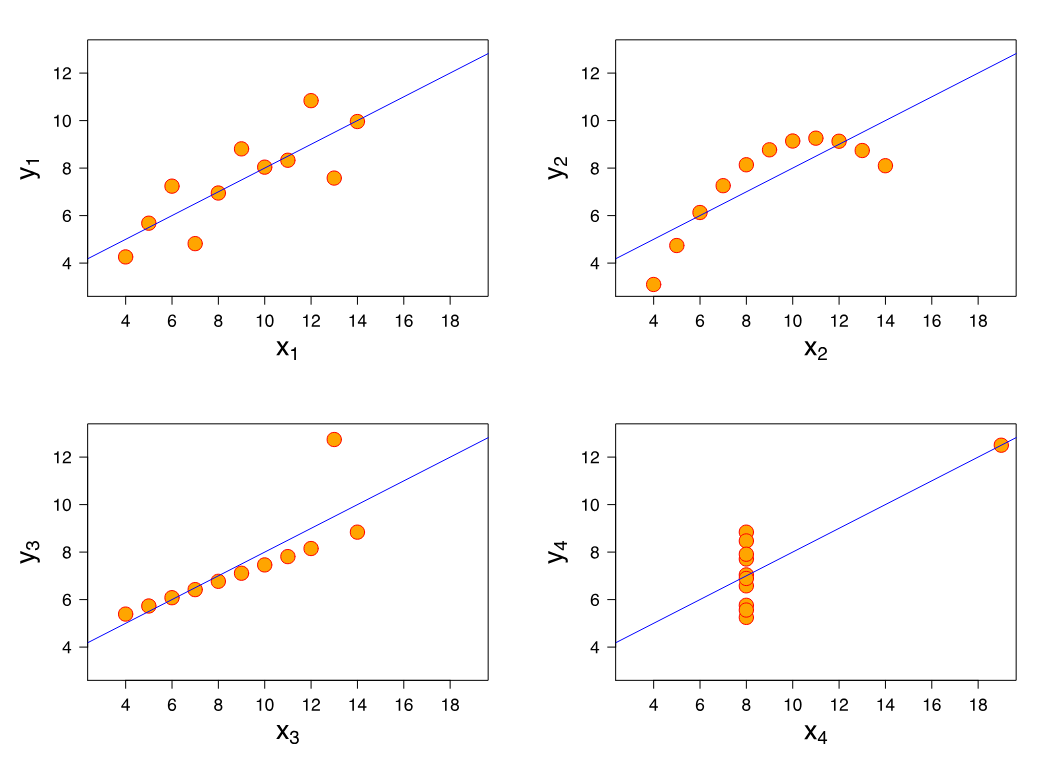

## What is Pearson’s R? (3 marks)

**Pearson’s R in Linear Regression** is a measure of the linear correlation between two variables, typically the independent variable (predictor) and the dependent variable (outcome). It quantifies the strength and direction of the linear relationship between these two variables.

### **Explanation (3 Marks):**

1. **Definition (1 Mark):**
   - Pearson's R, also known as the Pearson correlation coefficient, is a statistic that ranges from -1 to 1. A value of 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship between the variables.

2. **Calculation (1 Mark):**
   - The Pearson’s R is calculated as the ratio of the covariance of the two variables to the product of their standard deviations. Mathematically, it is expressed as:

     \[
     R = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
     \]

   where:
   - \(\text{Cov}(X, Y)\) is the covariance of the variables \(X\) (independent) and \(Y\) (dependent),
   - \(\sigma_X\) and \(\sigma_Y\) are the standard deviations of \(X\) and \(Y\), respectively.

3. **Importance in Linear Regression (1 Mark):**
   - In the context of linear regression, Pearson's R helps to understand how well the independent variable predicts the dependent variable. A high absolute value of R indicates that the independent variable is a good predictor of the dependent variable, which supports the linear regression model. However, it’s important to remember that correlation does not imply causation; a strong correlation doesn’t necessarily mean that one variable causes changes in the other.

## What is scaling? Why is scaling performed? What is the difference between normalized scaling and standardized scaling? (3 marks)

### **Scaling in Machine Learning (1 Mark):**
Scaling refers to the process of adjusting the range of features in your dataset so that they can be compared on a common scale. This is particularly important in algorithms where the distance between data points or the magnitudes of features matter, such as in gradient descent optimization, support vector machines, or k-nearest neighbors.

### **Why Scaling is Performed (1 Mark):**
Scaling is performed to:
- **Improve Model Performance:** Algorithms like gradient descent converge faster when features are scaled because the optimization process is more efficient when the features are within the same range.
- **Ensure Equal Contribution:** Scaling ensures that all features contribute equally to the model. Without scaling, features with larger ranges could disproportionately influence the model's predictions.
- **Enhance Interpretability:** It makes it easier to interpret the results of the model, particularly in distance-based algorithms.

### **Difference Between Normalized Scaling and Standardized Scaling (1 Mark):**

- **Normalized Scaling:**
  - **Definition:** Normalization scales the data to a fixed range, typically [0, 1] or [-1, 1]. It adjusts the values to be within a specific range without affecting the relative differences between data points.
  - **Formula:** 

    \[
    X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
    \]

  - **Use Case:** Normalization is useful when you need to bound the values within a certain range, for instance, in algorithms that need bounded inputs like neural networks.

- **Standardized Scaling:**
  - **Definition:** Standardization scales the data based on the mean and standard deviation, resulting in features with a mean of 0 and a standard deviation of 1.
  - **Formula:**

    \[
    X_{\text{std}} = \frac{X - \mu}{\sigma}
    \]

  where \(\mu\) is the mean and \(\sigma\) is the standard deviation of the feature.

  - **Use Case:** Standardization is preferred when features have different distributions or when the model assumes that the data is normally distributed (e.g., in linear regression or logistic regression).

In summary, normalization constrains data within a specific range, making it useful for bounded inputs, while standardization adjusts data based on statistical properties, making it more suitable when the data's distribution is important.

## You might have observed that sometimes the value of VIF is infinite. Why does this happen? (3 marks)

### **Infinite VIF Value (1 Mark):**
The Variance Inflation Factor (VIF) is a measure used to detect multicollinearity in a regression model. It quantifies how much the variance of a regression coefficient is inflated due to the presence of multicollinearity among the independent variables. A VIF value becomes infinite when perfect multicollinearity is present, meaning that one independent variable is an exact linear combination of one or more other independent variables.

### **Cause of Infinite VIF (1 Mark):**
An infinite VIF occurs when the correlation between one independent variable and a combination of the other independent variables is perfect (correlation coefficient of 1 or -1). In this case, the model cannot distinguish between the perfectly correlated variables, and the variance of the affected variable's coefficient is infinitely inflated. Mathematically, this happens when the determinant of the matrix (X'X) used to compute VIF is zero, leading to a division by zero.

### **Implication and Solution (1 Mark):**
- **Implication:** An infinite VIF indicates severe multicollinearity, which can destabilize the regression coefficients, making them highly sensitive to changes in the model. This undermines the reliability of the model and can lead to incorrect interpretations.
- **Solution:** To address infinite VIF, you may need to:
  - **Remove one of the perfectly correlated variables** from the model.
  - **Combine the correlated variables** into a single feature through techniques like Principal Component Analysis (PCA).
  - **Rethink the model design** to avoid including redundant predictors.

In summary, an infinite VIF signifies that one variable is a perfect linear combination of others, leading to perfect multicollinearity, which must be addressed to ensure the stability and reliability of the regression model.

## What is a Q-Q plot? Explain the use and importance of a Q-Q plot in linear regression. (3 marks)


### Definition:

 A Q-Q plot is a scatter plot where the quantiles of a dataset are plotted against the quantiles of a theoretical distribution (e.g., normal distribution). If the data follows the theoretical distribution, the points on the Q-Q plot will approximately lie on a straight line.

 ### Use of a Q-Q Plot in Linear Regression:

#### 1. Assessing Normality of Residuals:
Purpose: One of the assumptions of linear regression is that the residuals (errors) of the model should be normally distributed.

Application:By plotting the residuals of a linear regression model on a Q-Q plot, you can visually check if they approximate a normal distribution. If the residuals are normally distributed, the points on the Q-Q plot should lie roughly along a straight line.

#### 2. Detecting Deviations from Normality:
Purpose: Deviations from normality in residuals can indicate problems with the model, such as non-linearity, heteroscedasticity, or outliers.

Application: If the Q-Q plot shows significant deviations from the straight line, it suggests that the residuals do not follow a normal distribution, potentially impacting the validity of the regression model's inference.

### Importance in Linear Regression:
#### Model Validity: 
Checking the normality of residuals is crucial for valid hypothesis testing and confidence interval estimation in linear regression. Non-normal residuals may affect the reliability of the model's statistical inferences.
#### Model Diagnostics: 
A Q-Q plot is a diagnostic tool that helps in understanding if transformations or alternative modeling approaches are needed to meet the assumptions of linear regression.
### Summary
A Q-Q plot is a vital diagnostic tool in linear regression used to check if residuals follow a normal distribution, which is an important assumption of linear regression. It helps validate the model's assumptions and guides necessary adjustments to improve the model's accuracy and reliability.